In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("tvmarketing.csv")
print(df.head()) 

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [3]:
print(df.dtypes)


TV       float64
Sales    float64
dtype: object


In [6]:
print(df.shape) 


(200, 2)


In [5]:
print(df.describe())


               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


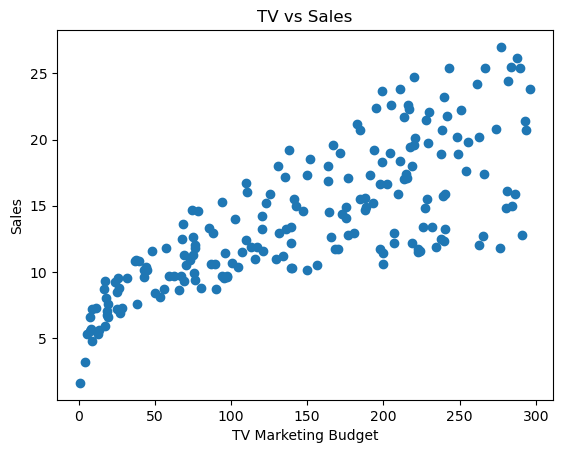

In [4]:
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()


In [19]:
X = df[['TV']]

y = df['Sales']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)


(140, 1) (60, 1)


In [20]:
X_mean = np.mean(X_train['TV'])
y_mean = np.mean(y_train)

numerator = sum((X_train['TV'] - X_mean) * (y_train - y_mean))
denominator = sum((X_train['TV'] - X_mean) ** 2)
m = numerator / denominator
c = y_mean - (m * X_mean)

print(f"Calculated Coefficients: m = {m}, c = {c}")


Calculated Coefficients: m = 0.04640780212815275, c = 7.23945983075114


In [22]:
y_pred_manual = m * X_test + c


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Intercept: 7.23945983075114
Coefficient: 0.04640780212815275


In [ ]:
y_pred = model.predict(X_test)


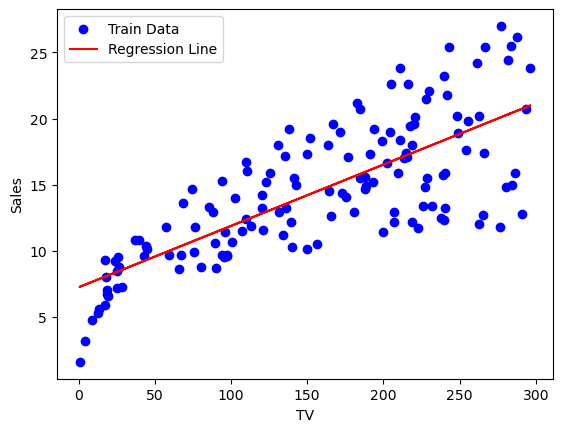

In [24]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()


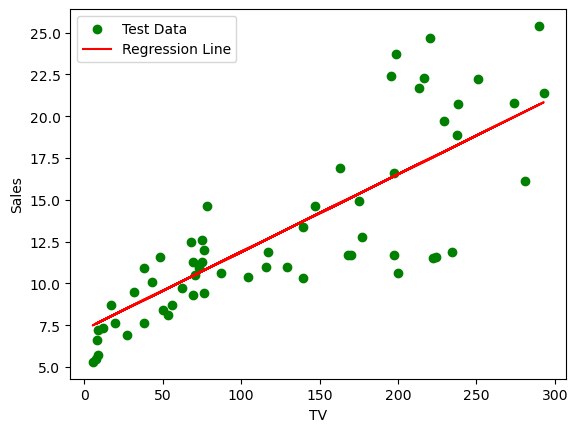

In [26]:



plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, model.predict(X_test), color='red', label='Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [30]:

from sklearn.model_selection import train_test_split

X = df[['TV']]  # Feature (Independent Variable)
y = df['Sales']  # Target (Dependent Variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)



from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R Squared Value: {r2}")


Mean Squared Error: 8.970991242413616
R Squared Value: 0.6714477229302764


In [32]:
y_pred_manual = m * X_test + c
y_pred_manual = m * X_test.values.flatten() + c

y_pred_manual = y_pred_manual.astype(float)


print(type(y_pred_manual))
print(y_pred_manual.dtype)

y_pred_manual = pd.to_numeric(y_pred_manual, errors='coerce')



<class 'numpy.ndarray'>
float64
